In [9]:
import cv2 

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
def mosaic(image,rect,size=15):
    (x, y, w, h) = rect
    face = image[y:y+h, x:x+w]
    face = cv2.resize(face, (size, size), interpolation=cv2.INTER_LINEAR)
    face = cv2.resize(face, (w, h), interpolation=cv2.INTER_NEAREST)
    image[y:y+h, x:x+w] = face
    return image

In [ ]:
#for video
video_path = 'vid.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")

In [ ]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:

out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

In [ ]:
frame_count = 0
selected_faces = []
detected_faces_count = 0

REFERENCE

In [18]:
import cv2
# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to apply mosaic effect
def apply_mosaic(image, rect, size=15):
    (x, y, w, h) = rect
    face = image[y:y+h, x:x+w]
    face = cv2.resize(face, (size, size), interpolation=cv2.INTER_LINEAR)
    face = cv2.resize(face, (w, h), interpolation=cv2.INTER_NEAREST)
    image[y:y+h, x:x+w] = face
    return image

# Open video file
video_path = 'try.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create a VideoWriter object to save the output video
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Process the video
frame_count = 0
detected_faces_count = 0
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # 
    # # Draw bounding boxes around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # x,y,w,h = cv2.boundingRect(frame)
    # cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    # Display the frame
    cv2.imshow('Frame', frame)
    count += 1
    for face in faces:
        frame = apply_mosaic(frame, face)
        
    # Write the frame to the output video
    out.write(frame)
    print(f"frame{count}/{length})")
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'apply_mosaic':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "..\..\..\AppData\Local\Temp\ipykernel_14452\479821631.py", line 53:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

In [ ]:

from mtcnn_cv2 import MTCNN
import cv2

detector = MTCNN()
def mosaic(image,rect,size=15):
    (x, y, w, h) = rect
    if w > 0 and h > 0:
        # Ensure the coordinates are within the image bounds
        x = max(0, x)
        y = max(0, y)
        w = min(w, image.shape[1] - x)
        h = min(h, image.shape[0] - y)
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (size, size), interpolation=cv2.INTER_LINEAR)
        face = cv2.resize(face, (w, h), interpolation=cv2.INTER_NEAREST)
        image[y:y+h, x:x+w] = face
    return image

video_path = 'try1.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")



# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create a VideoWriter object to save the output video
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
detector = MTCNN()
while cap.isOpened():
    success, image = cap.read()
    if not success:
        print('ignore empty cam frame')
        break
    result = detector.detect_faces(image)
    for face in result:
        x, y, w, h = face['box']
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # out.write(image)
    cv2.imshow('Face Detection and Mosaic', image)
    if cv2.waitKey(5) & 0xFF == ord('q'): 
        break
cap.release()
out.release()
cv2.destroyAllWindows()

RetinaFace

In [5]:
from deepface import DeepFace
import time
t = time.time()
a = DeepFace.find(img_path='1.png',db_path='faces',model_name='Facenet512',enforce_detection=False,threshold=0.5)
end = time.time() - t
print(end)
print(a)


24-07-17 15:55:00 - Searching 1.png in 9 length datastore
24-07-17 15:55:00 - find function duration 0.271756649017334 seconds
0.27275776863098145
[      identity                                      hash  target_x  target_y  \
0  faces\3.png  a39176f28ff38ebb45d83c1a81b7f398d71ac097       -49        13   
1  faces\6.png  0e1c52b0944a43f97508508e10fb82107a6d9419        -4        15   
2  faces\4.png  4af7974ba230344df6404c648e8ffdc5accbef09      -148        24   
3  faces\7.png  f227aa6032b0c3209055d759c8ad355a1528cc57        58        58   
4  faces\2.png  200da039fdbdf96c567c72cd97b4096dc3a06522         0         0   
5  faces\9.png  71953d0cd43eb5ea31c475cf34f77ac7dc533c2b         0         0   

   target_w  target_h  source_x  source_y  source_w  source_h  threshold  \
0       338       338       -86        46       589       589        0.5   
1       208       208       -86        46       589       589        0.5   
2       506       506       -86        46       589       589  

In [35]:
def check_faces(result):
    if isinstance(result, list) and all(df.empty for df in result):
        return True
    else: 
        if isinstance(a, list) and len(a) > 0 and not a[0].empty:
            first_match = a[0]
            coordinates = first_match[['source_x', 'source_y', 'source_w', 'source_h']].iloc[0]
            print(coordinates)

# Check if any faces are found
face_found = check_faces(a)
print(face_found)

source_x    -86
source_y     46
source_w    589
source_h    589
Name: 0, dtype: int64
None


(506, 344, 3)


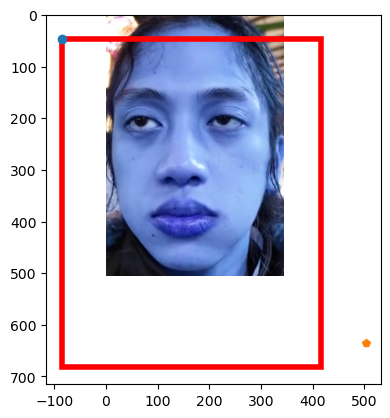

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
ee = cv2.imread('1.png')
ee = cv2.resize(ee,None,fx = 0.75, fy = 0.75)
print(ee.shape)
plt.imshow(ee)
plt.plot(-86,46,'o')
plt.plot(-86+589,46+589,'p')
plt.gca().add_patch(Rectangle((-86,46),-86+589,46+589,
                    edgecolor='red',
                    facecolor='none',
                    lw=4))
plt.show()


In [7]:
import cv2
import numpy as np
from deepface import DeepFace
import pandas as pd



input_video = cv2.VideoCapture('try.mp4')

dir = "C:/Users/Jai/Desktop/projects/jp/faces"

def mosaic(image, x, y, w, h, blur_level=95):
    if w > 0 and h > 0:
        roi = image[y:y+h, x:x+w]
        if roi.size != 0:
            blurred_roi = cv2.GaussianBlur(roi, (blur_level, blur_level), 0)
            image[y:y+h, x:x+w] = blurred_roi
    return image
count = 0
while True:
    ret, frame = input_video.read()
    if not ret:
        print('no vid')
        break
    
    result = DeepFace.find(img_path=frame,db_path='faces',enforce_detection=False,threshold=0.5)
    if isinstance(result, list) and all(df.empty for df in result):
        print('no matches')
    else:
        if isinstance(result, list) and len(result) > 0 and not result[0].empty:
            first_match = result[0]
            coordinates = first_match[['source_x', 'source_y', 'source_w', 'source_h']].iloc[0]
            cv2.rectangle(frame, (coordinates[0], coordinates[1]), (coordinates[2], coordinates[3]), (0, 0, 255), 2)
            cv2.imwrite("eeee/frame%d.jpg" % count, frame)
    count = count+1
    print('FRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE::: ',count)
# Release the video objects
input_video.release()
# output_video.release()
cv2.destroyAllWindows()


24-07-17 20:55:40 - Found 8 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


Finding representations:  12%|█▎        | 1/8 [00:02<00:15,  2.15s/it]

1/1 [==============================] - 0s 15ms/step


Finding representations:  25%|██▌       | 2/8 [00:03<00:09,  1.53s/it]

1/1 [==============================] - 0s 14ms/step


Finding representations:  38%|███▊      | 3/8 [00:03<00:05,  1.15s/it]

1/1 [==============================] - 0s 14ms/step


Finding representations:  50%|█████     | 4/8 [00:04<00:04,  1.02s/it]

1/1 [==============================] - 0s 14ms/step


Finding representations:  62%|██████▎   | 5/8 [00:05<00:02,  1.07it/s]

1/1 [==============================] - 0s 15ms/step


Finding representations:  75%|███████▌  | 6/8 [00:06<00:01,  1.09it/s]

1/1 [==============================] - 0s 15ms/step


Finding representations:  88%|████████▊ | 7/8 [00:07<00:00,  1.09it/s]

1/1 [==============================] - 0s 14ms/step


Finding representations: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

24-07-17 20:55:48 - There are now 8 representations in ds_model_vggface_detector_mtcnn_aligned_normalization_base_expand_0.pkl
24-07-17 20:55:48 - Searching [[[ 80 104 133]
  [ 80 104 133]
  [ 81 105 134]
  ...
  [ 44  39 154]
  [113 102 189]
  [154 143 230]]

 [[ 80 104 133]
  [ 80 104 133]
  [ 80 104 133]
  ...
  [ 50  45 160]
  [118 107 194]
  [155 144 231]]

 [[ 80 104 133]
  [ 80 104 133]
  [ 81 105 134]
  ...
  [ 64  57 166]
  [133 117 198]
  [161 145 226]]

 ...

 [[ 55  46  80]
  [ 50  41  75]
  [ 41  32  66]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 49  40  74]
  [ 44  35  69]
  [ 37  28  62]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 45  36  70]
  [ 42  33  67]
  [ 35  26  60]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]] in 8 length datastore
1/1 [==============================] - ETA: 0s

2/2 [==============================] - 0s 5ms/step
24-07-17 20:55:50 - find function duration 10.399709939956665 seconds
FRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE:::  1
24-07-17 20:55:50 - Searching [[[ 80 104 133]
  [ 80 104 133]
  [ 81 105 134]
  ...
  [ 44  39 154]
  [113 102 189]
  [154 143 230]]

 [[ 80 104 133]
  [ 80 104 133]
  [ 80 104 133]
  ...
  [ 50  45 160]
  [118 107 194]
  [155 144 231]]

 [[ 80 104 133]
  [ 80 104 133]
  [ 81 105 134]
  ...
  [ 64  57 166]
  [133 117 198]
  [161 145 226]]

 ...

 [[ 55  46  80]
  [ 50  41  75]
  [ 41  32  66]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 49  40  74]
  [ 44  35  69]
  [ 37  28  62]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 45  36  70]
  [ 42  33  67]
  [ 35  26  60]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]] in 8 length datastore
2/2 [==============================] - 0s 5ms/step
24-07-17 20:55:52 - find function duration 2.

KeyboardInterrupt: 

In [1]:
import torch
    
print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

Torch version: 2.2.2+cu121
Is CUDA enabled? True


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
import os
import face_recognition
faces = []
for name in os.listdir("faces"):
    if name.endswith(".png"):
        image_path = os.path.join("faces", name)
        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image)
        
        if encodings:  # Check if encodings list is not empty
            encoding = encodings[0]
            faces.append(encoding)
            print(image_path, encoding)
        else:
            print(f"No faces found in {image_path}")

faces\1.png [-0.11528183  0.0207576   0.067872   -0.05667717 -0.03487608 -0.04487258
 -0.06100275 -0.14558293  0.15245341 -0.11424071  0.24168432 -0.00930091
 -0.12776935 -0.06266793  0.04296505  0.14976738 -0.14673463 -0.08491258
 -0.00794045 -0.00954853  0.07569702 -0.08116142  0.00632023  0.09231341
 -0.20379727 -0.28738493 -0.18474357 -0.07940403  0.03995736 -0.00499232
 -0.09035691  0.00119939 -0.21832848 -0.03251848 -0.00918044  0.11686008
  0.00344563 -0.01989953  0.1433585   0.04098083 -0.20570867  0.04251885
 -0.02575683  0.17663762  0.18551335  0.09511004  0.06814585 -0.06933179
  0.08685013 -0.14922206  0.09281322  0.10619231  0.11981734  0.07873957
 -0.04257108 -0.1699118   0.02411065  0.10192381 -0.18582205  0.05015627
  0.06440834 -0.0906264  -0.00678191 -0.03821723  0.23221701  0.14680484
 -0.15737423 -0.14305317  0.12685721 -0.12619212 -0.02301361  0.03345001
 -0.18949704 -0.20740734 -0.35952243  0.09151793  0.43638629  0.12492622
 -0.1953222   0.02611434 -0.10272101  0

In [1]:
import cv2
import face_recognition
import os

def mosaic(image, x, y, w, h, blur_level=95):
    if w > 0 and h > 0:
        roi = image[y:y+h, x:x+w]
        if roi.size != 0:
            blurred_roi = cv2.GaussianBlur(roi, (blur_level, blur_level), 0)
            image[y:y+h, x:x+w] = blurred_roi
    return image

faces = []
for name in os.listdir("faces"):
    if name.endswith(".png"):
        image_path = os.path.join("faces", name)
        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image)
        
        if encodings:  # Check if encodings list is not empty
            encoding = encodings[0]
            faces.append(encoding)
            print(image_path, encoding)
        else:
            print(f"No faces found in {image_path}")

known_face_names = []
known_face_encodings = []

# Open the input video
input_video = cv2.VideoCapture('try.mp4')
if not input_video.isOpened():
  raise ValueError("Error opening video stream or file.")

# length = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))
# width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(input_video.get(cv2.CAP_PROP_FPS))

# # Initialize the video writer for the output video
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# output_video = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

count = 0
while True:
    ret, frame = input_video.read()
    if not ret:
        break
    print(frame.shape)
    cv2.resize(frame, (360,640,3))
    count += 1
    if count % 10 == 0:
        location  = face_recognition.face_locations(frame,model='cnn')
        encodings = face_recognition.face_encodings(frame,location)

        for face_encodings,face_locations in zip(encodings,location):
            results = face_recognition.compare_faces(faces,face_encodings,tolerance=0.7)
            top_left = (face_locations[3],face_locations[0])
            bottom_right = (face_locations[1],face_locations[2])
            cv2.rectangle(frame,top_left,bottom_right,(255,0,0),3)
            cv2.imwrite("cnn/frame%d.jpg" % count, frame)
            print("FRAME: ",count)
        # output_video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        if cv2.waitKey(5) & 0xFF == ord('q'): 
            break
input_video.release()


faces\2.png [-0.07558145  0.03703917  0.07406574 -0.0857746  -0.02429424 -0.01864846
 -0.11795118 -0.10871711  0.15604283 -0.13660991  0.23638454 -0.02359277
 -0.18160321 -0.07904749 -0.01757842  0.17926234 -0.12775987 -0.17070116
  0.00102548 -0.02771795  0.03992588 -0.03013486  0.018009    0.13652036
 -0.15880722 -0.32117319 -0.15967055 -0.14554952 -0.05326391 -0.04517358
 -0.07507309  0.00293102 -0.19683567  0.01154442 -0.00230029  0.06797586
  0.02966255 -0.02495706  0.12899572  0.06738853 -0.20165506  0.03605689
 -0.03193311  0.21221729  0.17318881  0.05593184  0.06622931 -0.06264972
  0.03996456 -0.16143441  0.11962906  0.13075754  0.09840824  0.0474505
 -0.01752712 -0.14074589  0.00173338  0.12184631 -0.15128528  0.08127867
  0.05305262 -0.10211304 -0.03930359 -0.03630769  0.25845274  0.15960456
 -0.15416929 -0.16285789  0.17297541 -0.14251864 -0.0656635   0.02782712
 -0.19484402 -0.17745705 -0.31338215  0.08960918  0.39459351  0.14320135
 -0.22464277  0.06902649 -0.09087683  0.

In [1]:
import face_recognition
import cv2
import os


# Load the video
video_path = 'try.mp4'
output_video_path = 'output.mp4'
input_video = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(input_video.get(cv2.CAP_PROP_FPS))

# Set up the output video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
count = 0
while input_video.isOpened():
    ret, frame = input_video.read()
    if not ret:
        break
    print("FRAME : ",count)
    count += 1
    # Convert the frame to RGB for face_recognition
    rgb_frame = frame[:, :, ::-1]

    # Detect faces
    face_locations = face_recognition.face_locations(rgb_frame, model='cnn')  # Use 'cnn' model for GPU
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(faces, face_encoding)
        if not any(matches):
            # Blur the face if it does not match
            face_region = frame[top:bottom, left:right]
            blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)
            frame[top:bottom, left:right] = blurred_face

    # Write the processed frame to the output video
    output_video.write(frame)

# Release resources
input_video.release()
output_video.release()
cv2.destroyAllWindows()


FRAME :  0


TypeError: compute_face_descriptor(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], face: _dlib_pybind11.full_object_detection, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vector
    2. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], num_jitters: int = 0) -> _dlib_pybind11.vector
    3. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], faces: _dlib_pybind11.full_object_detections, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectors
    4. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], batch_faces: List[_dlib_pybind11.full_object_detections], num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectorss
    5. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], num_jitters: int = 0) -> _dlib_pybind11.vectors

Invoked with: <_dlib_pybind11.face_recognition_model_v1 object at 0x000001E9AE6A0030>, array([[[133, 104,  80],
        [133, 104,  80],
        [134, 105,  81],
        ...,
        [154,  39,  44],
        [189, 102, 113],
        [230, 143, 154]],

       [[133, 104,  80],
        [133, 104,  80],
        [133, 104,  80],
        ...,
        [160,  45,  50],
        [194, 107, 118],
        [231, 144, 155]],

       [[133, 104,  80],
        [133, 104,  80],
        [134, 105,  81],
        ...,
        [166,  57,  64],
        [198, 117, 133],
        [226, 145, 161]],

       ...,

       [[ 80,  46,  55],
        [ 75,  41,  50],
        [ 66,  32,  41],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 74,  40,  49],
        [ 69,  35,  44],
        [ 62,  28,  37],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 70,  36,  45],
        [ 67,  33,  42],
        [ 60,  26,  35],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]]], dtype=uint8), <_dlib_pybind11.full_object_detection object at 0x000001E9AE6A1830>, 1

In [ ]:
import cv2
import numpy as np
from deepface import DeepFace
import retinaface
from deepface.modules.verification import find_euclidean_distance
from deepface.modules.verification import find_threshold

def mosaic(image, x, y, w, h, blur_level=95):
    if w > 0 and h > 0:
        roi = image[y:y+h, x:x+w]
        if roi.size != 0:
            blurred_roi = cv2.GaussianBlur(roi, (blur_level, blur_level), 0)
            image[y:y+h, x:x+w] = blurred_roi
    return image

# Load the target image and get its embedding
target = cv2.imread("target.png")
target_rep = DeepFace.represent(target, model_name='ArcFace', enforce_detection=False)[0]['embedding']
target_rep = np.array(target_rep)

# Open the input video
input_video = cv2.VideoCapture('try.mp4')
length = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(input_video.get(cv2.CAP_PROP_FPS))

# Initialize the video writer for the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Define the threshold for the model
threshold = find_threshold(model_name='ArcFace', distance_metric='euclidean')

while True:
    ret, frame = input_video.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detected_faces = retinaface.RetinaFace.detect_faces(frame_rgb)

    for key in detected_faces.keys():
        identity = detected_faces[key]
        facial_area = identity['facial_area']

        x, y, w, h = facial_area[0], facial_area[1], facial_area[2] - facial_area[0], facial_area[3] - facial_area[1]

        face_region = frame_rgb[y:y+h, x:x+w]

        if face_region.size == 0:
            continue

        face_rep = DeepFace.represent(face_region, model_name='ArcFace', enforce_detection=False)[0]['embedding']
        face_rep = np.array(face_rep)

        distance = find_euclidean_distance(target_rep, face_rep)

        if distance > threshold:
            frame = mosaic(frame, x, y, w, h)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    output_video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Release the video objects
input_video.release()
output_video.release()
cv2.destroyAllWindows()


In [3]:
import os
import cv2
import numpy as np
from deepface import DeepFace
import faiss

# Function to get embeddings for an image
def get_embedding(image_path, model_name='ArcFace'):
    image = cv2.imread(image_path)
    embedding = DeepFace.represent(image, model_name=model_name, enforce_detection=False)[0]['embedding']
    return np.array(embedding)

# Directory containing the images
image_folder = "/faces"

# List to store embeddings
embeddings = []

# Loop through each image in the folder and get embeddings
for name in os.listdir("faces"):
    if name.endswith(".png"):
        image_path = os.path.join("faces", name)
        embedding = get_embedding(image_path)
        embeddings.append(embedding)

# Convert embeddings list to numpy array
embeddings_array = np.array(embeddings).astype('float32')

# Create a FAISS index
d = embeddings_array.shape[1]  # Dimension of the embeddings
index = faiss.IndexFlatL2(d)  # Using L2 (Euclidean) distance
index.add(embeddings_array)  # Add embeddings to the index

# Save the FAISS index for later use
faiss.write_index(index, "vector_store.index")

print("Vector store created and saved as 'vector_store.index'")


Vector store created and saved as 'vector_store.index'


In [2]:
import cv2
import numpy as np
from deepface import DeepFace
import retinaface
import faiss

def mosaic(image, x, y, w, h, blur_level=95):
    if w > 0 and h > 0:
        roi = image[y:y+h, x:x+w]
        if roi.size != 0:
            blurred_roi = cv2.GaussianBlur(roi, (blur_level, blur_level), 0)
            image[y:y+h, x:x+w] = blurred_roi
    return image

# Load the FAISS index
index = faiss.read_index("vector_store.index")

# Open the input video
input_video = cv2.VideoCapture('try.mp4')
length = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(input_video.get(cv2.CAP_PROP_FPS))

# Initialize the video writer for the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Define the threshold for comparison
threshold = 0.5
count = 0
while True:
    ret, frame = input_video.read()
    if not ret:
        break
    print("FRAMEEEEEEEEEEE: ",count)
    count += 1
    if count % 10 ==0:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        detected_faces = retinaface.RetinaFace.detect_faces(frame_rgb)

        for key in detected_faces.keys():
            identity = detected_faces[key]
            facial_area = identity['facial_area']

            x, y, w, h = facial_area[0], facial_area[1], facial_area[2] - facial_area[0], facial_area[3] - facial_area[1]

            face_region = frame_rgb[y:y+h, x:x+w]

            if face_region.size == 0:
                continue

            face_rep = DeepFace.represent(face_region, model_name='ArcFace', enforce_detection=False)[0]['embedding']
            face_rep = np.array(face_rep).astype('float32').reshape(1, -1)

            # Search for the nearest neighbor in the FAISS index
            D, I = index.search(face_rep, 1)

            # If the distance is greater than the threshold, blur the face
            if D[0][0] > threshold:
                frame = mosaic(frame, x, y, w, h)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        output_video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Release the video objects
input_video.release()
output_video.release()
cv2.destroyAllWindows()


FRAMEEEEEEEEEEE:  0
FRAMEEEEEEEEEEE:  1
FRAMEEEEEEEEEEE:  2
FRAMEEEEEEEEEEE:  3
FRAMEEEEEEEEEEE:  4
FRAMEEEEEEEEEEE:  5
FRAMEEEEEEEEEEE:  6
FRAMEEEEEEEEEEE:  7
FRAMEEEEEEEEEEE:  8
FRAMEEEEEEEEEEE:  9
FRAMEEEEEEEEEEE:  10
FRAMEEEEEEEEEEE:  11
FRAMEEEEEEEEEEE:  12
FRAMEEEEEEEEEEE:  13
FRAMEEEEEEEEEEE:  14
FRAMEEEEEEEEEEE:  15
FRAMEEEEEEEEEEE:  16
FRAMEEEEEEEEEEE:  17
FRAMEEEEEEEEEEE:  18
FRAMEEEEEEEEEEE:  19
FRAMEEEEEEEEEEE:  20
FRAMEEEEEEEEEEE:  21
FRAMEEEEEEEEEEE:  22
FRAMEEEEEEEEEEE:  23
FRAMEEEEEEEEEEE:  24
FRAMEEEEEEEEEEE:  25
FRAMEEEEEEEEEEE:  26
FRAMEEEEEEEEEEE:  27
FRAMEEEEEEEEEEE:  28
FRAMEEEEEEEEEEE:  29
FRAMEEEEEEEEEEE:  30
FRAMEEEEEEEEEEE:  31
FRAMEEEEEEEEEEE:  32
FRAMEEEEEEEEEEE:  33
FRAMEEEEEEEEEEE:  34
FRAMEEEEEEEEEEE:  35
FRAMEEEEEEEEEEE:  36
FRAMEEEEEEEEEEE:  37
FRAMEEEEEEEEEEE:  38
FRAMEEEEEEEEEEE:  39
FRAMEEEEEEEEEEE:  40
FRAMEEEEEEEEEEE:  41
FRAMEEEEEEEEEEE:  42
FRAMEEEEEEEEEEE:  43
FRAMEEEEEEEEEEE:  44
FRAMEEEEEEEEEEE:  45
FRAMEEEEEEEEEEE:  46
FRAMEEEEEEEEEEE:  47
FR

KeyboardInterrupt: 